In [1]:
# loading libraries

import glob
import os

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pywaffle import Waffle

In [2]:
# Display all df columns
pd.set_option("display.max_columns", None)

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

- Clusters general info

In [3]:
df_clusters = pd.read_csv("./assets/csv/df_clusters.csv", sep=",", index_col=0)

In [4]:
df_clusters

,cluster,icao_code,icao_code_old,lat_dd,long_dd,city_primary,state,count,percentage
0,1,SBGR,NaN,-23.435556,-46.473056,Guarulhos,SP,818607,9.35
1,1,SBBR,NaN,-15.871111,-47.918611,Brasília,DF,732100,8.37
2,2,SBSP,NaN,-23.626111,-46.656389,São paulo,SP,794108,9.07
3,2,SBGL,NaN,-22.810000,-43.250556,Rio de janeiro,RJ,520716,5.95
4,2,SBSV,NaN,-12.908611,-38.322500,Salvador,BA,409223,4.68
...,...,...,...,...,...,...,...,...,...
221,8,SWFX,NaN,-11.631944,-50.688333,São félix do araguaia,MT,710,0.01
222,8,SWLB,NaN,-7.278889,-64.769444,Lábrea,AM,675,0.01
223,8,SBPG,SSZW,-25.184444,-50.143889,Ponta grossa,PR,674,0.01
224,8,SBUA,NaN,-0.148056,-66.985833,São gabriel da cachoeira,AM,875,0.01


In [5]:
count_perc = df_clusters.groupby("cluster")[["count", "percentage"]].sum().reset_index()

In [6]:
count_perc

,cluster,count,percentage
0,1,1550707,17.72
1,2,2338474,26.72
2,3,2117470,24.20
3,4,1653230,18.89
4,5,148016,1.70
5,6,495725,5.65
6,7,234609,2.69
7,8,213611,2.34


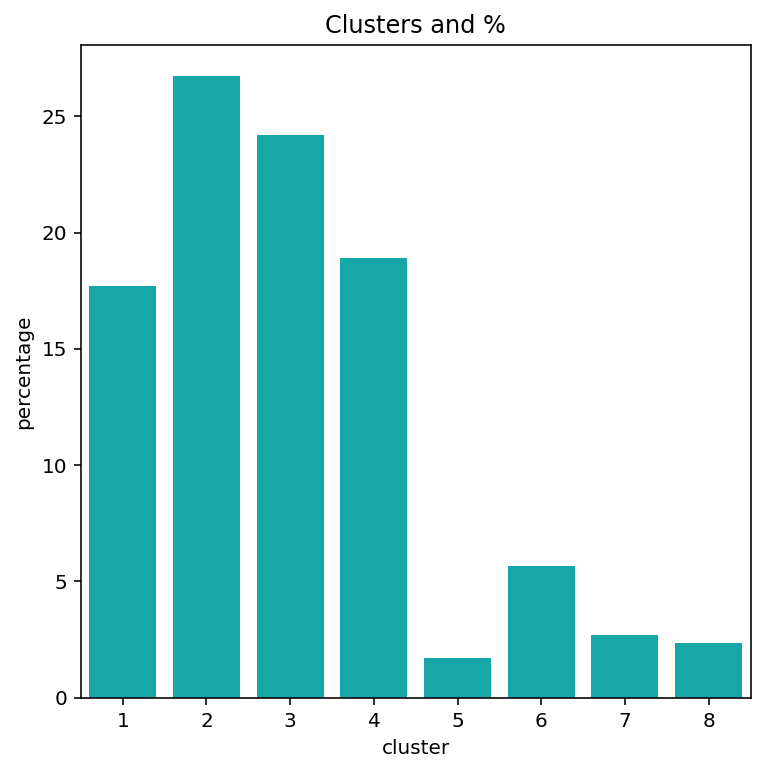

In [7]:
# Set up for higher resolution screen
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(6, 6))
plt.title("Clusters and %")
sns.barplot(x="cluster", y="percentage", data=count_perc, color="c")
plt.show()

In [8]:
# read csv

In [9]:
df_regional_flights = pd.read_csv("./assets/csv/df_regional_flights.csv", sep=',').drop(columns='Unnamed: 0')

In [20]:
df_regional_flights.head(2)

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,RSL,SL,5260,2,SBLO,LDB,Governador José Richa,Londrina,PR,5,2002-09-01,2002,9,1,11:46:00,2002-09-01,2002,9,1,7,SETEMBRO,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,SUL,12:27:00,2002-09-01,2002,9,1,E145,EMBRAER RJ145 AMAZON,784.0,4908,315.0,0.68,463.42,50,21.0,0.0,199,0,0.0,0.0,0.0,1774.0,0.0,0,0,0,62685,0,15750,6615,1546,1546,5260_2,SBLO-SBCT,LDB-CWB,-23.3303,-51.1367,6,-25.5317,-49.1761,4
1,RSL,SL,5249,1,SBLO,LDB,Governador José Richa,Londrina,PR,5,2002-09-01,2002,9,1,19:57:00,2002-09-01,2002,9,1,7,SETEMBRO,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,SUL,20:37:00,2002-09-01,2002,9,1,E145,EMBRAER RJ145 AMAZON,756.0,4875,315.0,0.67,470.34,50,43.0,0.0,267,0,0.0,0.0,0.0,3492.0,0.0,0,0,0,84105,0,15750,13545,1535,1535,5249_1,SBLO-SBCT,LDB-CWB,-23.3303,-51.1367,6,-25.5317,-49.1761,4


In [21]:
df_regional_flights['seats_total'] = df_regional_flights['seats_sold'] + df_regional_flights['seats_free']

In [22]:
df_regional_flights.head(2)

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest,seats_total
0,RSL,SL,5260,2,SBLO,LDB,Governador José Richa,Londrina,PR,5,2002-09-01,2002,9,1,11:46:00,2002-09-01,2002,9,1,7,SETEMBRO,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,SUL,12:27:00,2002-09-01,2002,9,1,E145,EMBRAER RJ145 AMAZON,784.0,4908,315.0,0.68,463.42,50,21.0,0.0,199,0,0.0,0.0,0.0,1774.0,0.0,0,0,0,62685,0,15750,6615,1546,1546,5260_2,SBLO-SBCT,LDB-CWB,-23.3303,-51.1367,6,-25.5317,-49.1761,4,21.0
1,RSL,SL,5249,1,SBLO,LDB,Governador José Richa,Londrina,PR,5,2002-09-01,2002,9,1,19:57:00,2002-09-01,2002,9,1,7,SETEMBRO,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,SUL,20:37:00,2002-09-01,2002,9,1,E145,EMBRAER RJ145 AMAZON,756.0,4875,315.0,0.67,470.34,50,43.0,0.0,267,0,0.0,0.0,0.0,3492.0,0.0,0,0,0,84105,0,15750,13545,1535,1535,5249_1,SBLO-SBCT,LDB-CWB,-23.3303,-51.1367,6,-25.5317,-49.1761,4,43.0


In [11]:
df_regional_flights.groupby('icao_origin').agg(
    nr_aircraft_models=('aircraft_model',lambda x: x.nunique()),
    nr_routes=('route_icao',lambda x: x.nunique()),
    nr_flights=('flight_unique_nr',lambda x: x.nunique()),
    first_flight=('dep_year','min'),
    last_flight=('dep_year','max'),
    flight_dist_mean=('flight_distance_km','mean'),
    flight_dist_median=('flight_distance_km','median'),
    seat_cap_mean=('seats_available','mean'),
    seat_cap_median=('seats_available','median'),
    seat_cap_min=('seats_available','min'),
    seat_cap_max=('seats_available','max'),
    seat_sold_mean=('seats_sold','mean'),
    seat_sold_median=('seats_sold','median'),
).round(2).reset_index()

,icao_origin,nr_aircraft_models,nr_routes,nr_flights,first_flight,last_flight,flight_dist_mean,flight_dist_median,seat_cap_mean,seat_cap_median,seat_cap_min,seat_cap_max,seat_sold_mean,seat_sold_median
0,SBAA,1,3,9,2012,2015,134.82,83.0,9.00,9,9,9,4.68,5.0
1,SBAC,6,4,4,2020,2021,902.42,508.0,82.68,70,9,174,37.58,33.0
2,SBAE,15,9,98,2011,2021,224.89,220.0,89.68,70,0,180,58.49,58.0
3,SBAQ,5,2,7,2006,2020,169.94,169.0,69.63,70,45,168,40.76,40.0
4,SBAT,11,3,11,2007,2021,630.71,643.0,107.79,118,9,170,78.13,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,SWRD,6,4,16,2010,2014,418.98,182.0,74.50,70,0,118,54.70,55.0
191,SWSI,8,4,35,2007,2018,559.69,423.0,92.05,86,45,148,70.08,67.0
192,SWTP,1,2,4,2010,2014,261.85,219.0,45.03,45,0,47,24.61,26.0
193,SWTS,1,4,16,2019,2021,256.52,180.0,9.00,9,9,9,3.96,4.0


In [12]:
teste = df_regional_flights.groupby('cluster_origin').agg(
    nr_airports=('icao_origin',lambda x: x.nunique()),
).reset_index()

In [13]:
teste

,cluster_origin,nr_airports
0,4,2
1,5,2
2,6,12
3,7,16
4,8,163


In [14]:
percentage = round((teste['nr_airports'] / teste['nr_airports'].sum()) * 100, 2)

In [15]:
teste.insert(loc=2, column='percentage', value=percentage)

In [16]:
teste

,cluster_origin,nr_airports,percentage
0,4,2,1.03
1,5,2,1.03
2,6,12,6.15
3,7,16,8.21
4,8,163,83.59


In [17]:
df_regional_flights_2021 = df_regional_flights[df_regional_flights.sched_year == 2021]

<AxesSubplot:xlabel='icao_carrier', ylabel='seats_sold'>

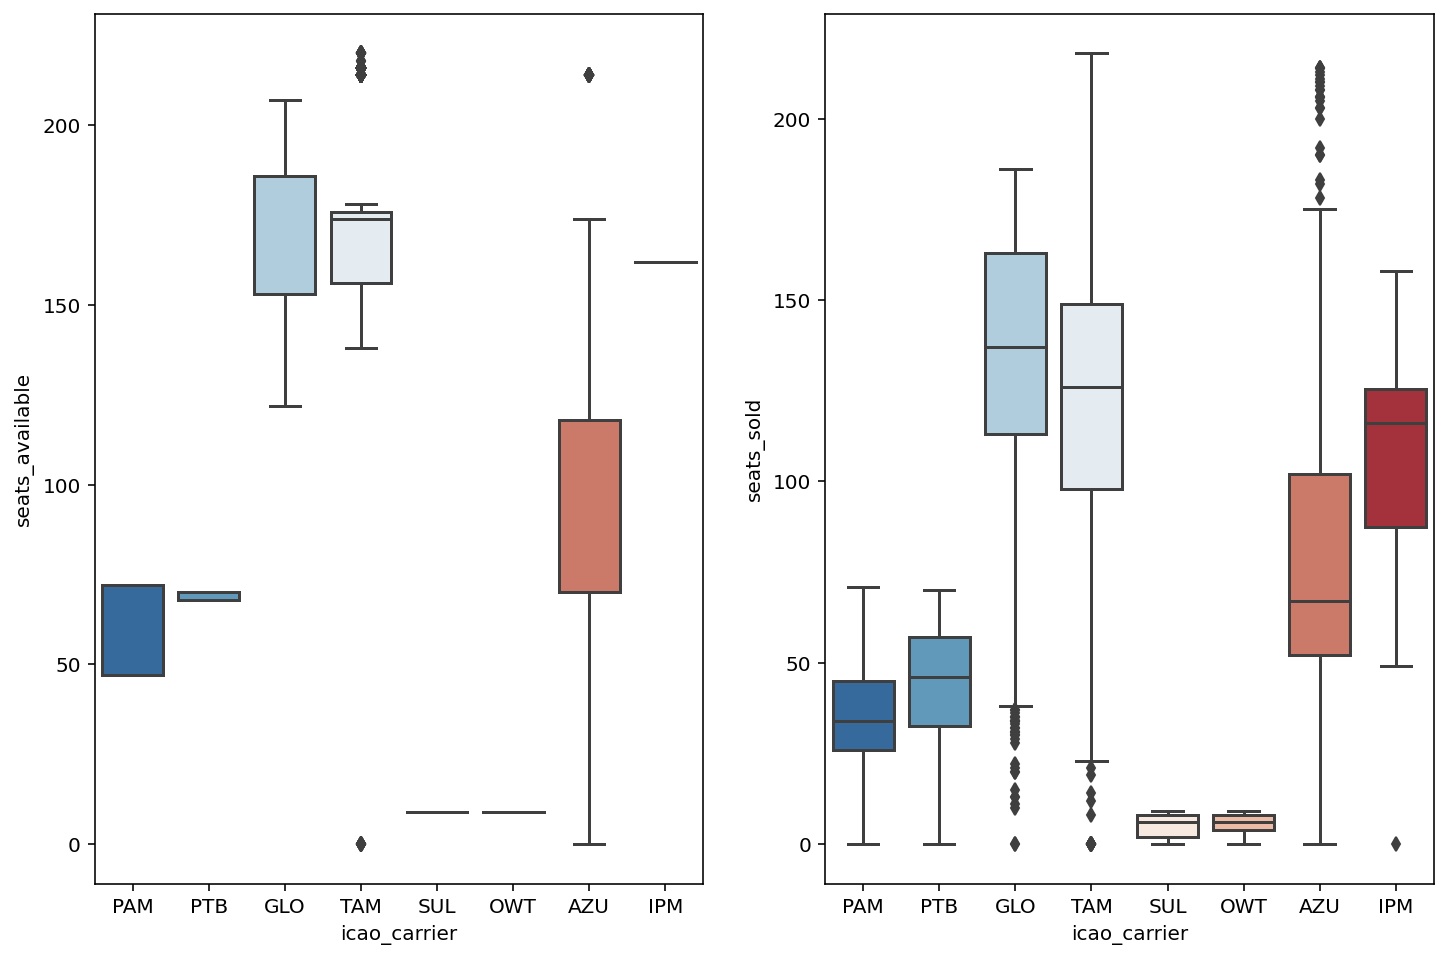

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x='icao_carrier', y='seats_available', data=df_regional_flights_2021, ax=ax[0], palette='RdBu_r')
sns.boxplot(x='icao_carrier', y='seats_sold', data=df_regional_flights_2021, ax=ax[1], palette='RdBu_r')

O q nós tínhamos combinado p a conclusão, além daqueles pontos q você anotou, era preciso antes fazer uma tabela referente ao início do período estudado (talvez a média dos primeiros cinco anos, ou pegar um único ano, o primeiro por exemplo) e compará-la com o final do período estudado (a média dos últimos 5 anos, ou pegar o ano de 2019, p exemplo) e comparar os seguintes itens: número de passageiros, número de voos, número de rotas, número de aeroportos, separando as informações entre aeroportos regionais e não regionais.

Assim a conclusão seria: comparando 2005 com 2020, o número de aeroportos regionais passou de x para y. O número de rotas saindo de aeroportos regionais passou de x em 2005 para y em 2020, etc.

Com essa comparação, você poderá chegar à conclusão se os aeroportos regionais aumentaram ou diminuíram ao longo desses 20 anos, em termos de passageiros, rotas, voos, número de aeroportos.


In [ ]:
airports_total

In [26]:
test = df_regional_flights.groupby('sched_year').agg(
    nr_airports=('icao_origin',lambda x: x.nunique()),
    nr_routes=('route_icao',lambda x: x.nunique()),
    nr_flights=('flight_unique_nr',lambda x: x.nunique()),
    nr_pax=('seats_total','sum'),
).round(2).reset_index()

In [27]:
test

,sched_year,nr_airports,nr_routes,nr_flights,nr_pax
0,2002,39,115,261,577808.0
1,2003,38,130,355,1858335.0
2,2004,30,110,360,2197952.0
3,2005,23,74,181,2010705.0
4,2006,30,89,218,1555317.0
5,2007,34,101,199,1421413.0
6,2008,26,75,152,1899226.0
7,2009,24,77,218,2747301.0
8,2010,75,240,527,3505560.0
9,2011,91,312,726,5093080.0


In [36]:
test.to_csv('./assets/csv/tableau/final.csv', sep=',')

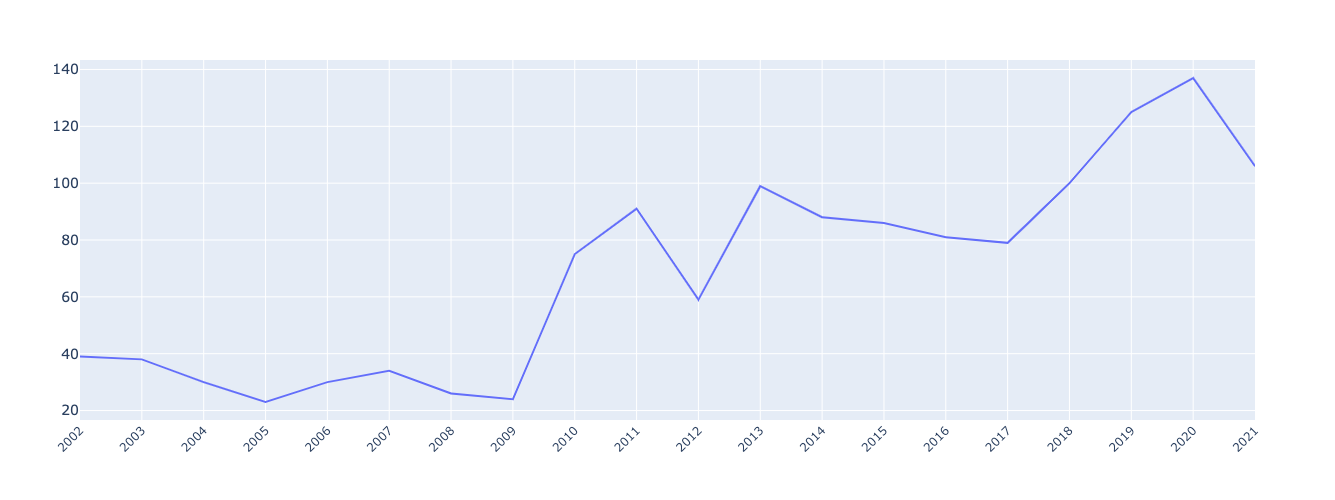

In [35]:
fig = px.line(test, x="sched_year", y="nr_airports")
fig.update_layout(
    title="",
    autosize=False,
    width=600,
    height=500,
    xaxis=dict(title="", tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="", titlefont_size=16, tickfont_size=14),
)
# fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()

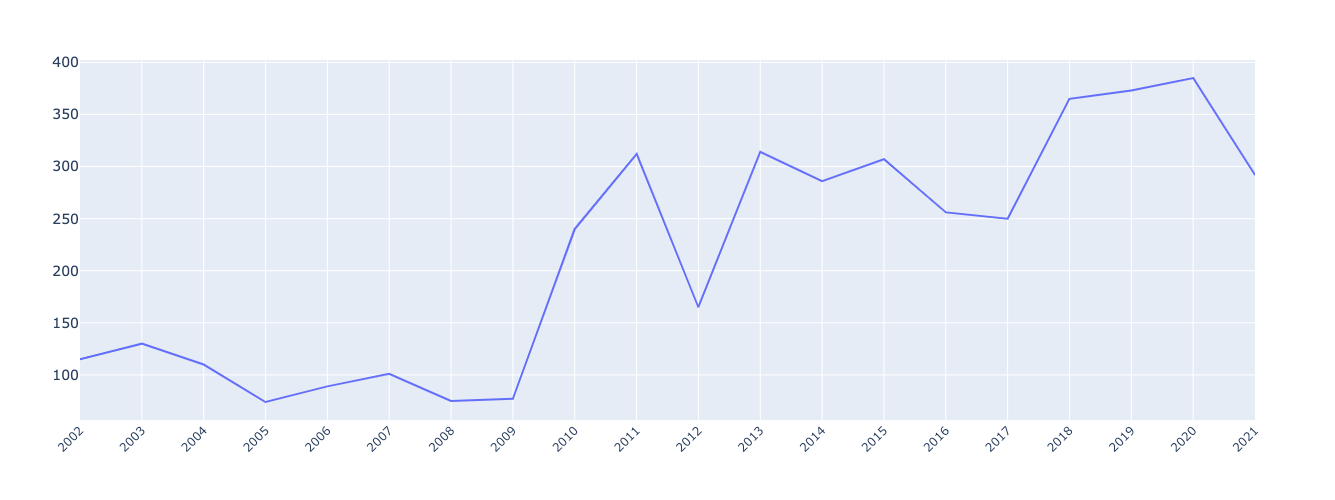

In [37]:
fig = px.line(test, x="sched_year", y="nr_routes")
fig.update_layout(
    title="",
    autosize=False,
    width=600,
    height=500,
    xaxis=dict(title="", tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="", titlefont_size=16, tickfont_size=14),
)
# fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()